# Binary Tree Conclusion

## Construct Binary Tree from Inorder and Postorder Traversal

https://leetcode.com/explore/learn/card/data-structure-tree/133/conclusion/942/

Given two integer arrays inorder and postorder where inorder is the inorder traversal of a binary tree and postorder is the postorder traversal of the same tree, construct and return the binary tree.

 

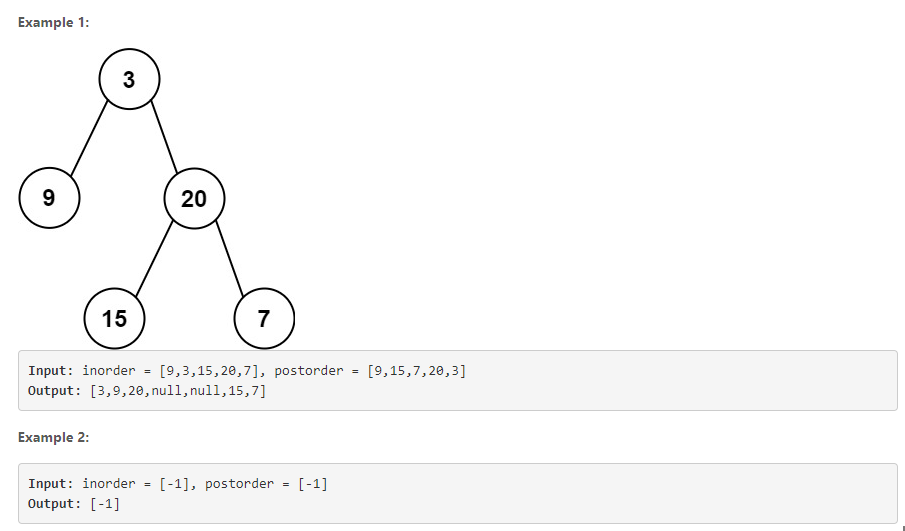

#### Good code for debugging
```cpp
        if(cur->val==20){
            cout<<s1<<" s1\n";
            cout<<t1<<" t1\n";
            cout<<s2<<" s2\n";
            cout<<t2<<" t2\n";
            cout<<i<<" i\n";
        }
```

#### Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    
    TreeNode* helper(vector<int>& inorder, vector<int>& postorder, int s1, int t1, int s2, int t2){

        if(s1>t1){
            return nullptr;
        }
        
        TreeNode* cur= new TreeNode(postorder[t2]);
        
        if(s1==t1){
            return cur;
        }
        
        int i;
        for(i=s1;i<=t1;i++){
            if(inorder[i]==cur->val){
                break;
            }
        }
        
        // if(cur->val==20){
        //     cout<<s1<<" s1\n";
        //     cout<<t1<<" t1\n";
        //     cout<<s2<<" s2\n";
        //     cout<<t2<<" t2\n";
        //     cout<<i<<" i\n";
        // }

        cur->left = helper(inorder, postorder, s1, i-1, s2, s2+(i-s1)-1);
        
        cur->right = helper(inorder, postorder, i+1, t1, s2+(i-s1), t2-1);
        
        
        // cout<<cur->val<<" cul->val\n";
        return cur;
    }
    

    TreeNode* buildTree(vector<int>& inorder, vector<int>& postorder) {
        TreeNode* root = helper(inorder, postorder, 0,inorder.size()-1,0,postorder.size()-1);
        return root;        
    }
};

```

### Solutions
https://leetcode.com/problems/construct-binary-tree-from-inorder-and-postorder-traversal/solution/

#### Approach 1: Recursion
```java
class Solution {
  int post_idx;
  int[] postorder;
  int[] inorder;
  HashMap<Integer, Integer> idx_map = new HashMap<Integer, Integer>();

  public TreeNode helper(int in_left, int in_right) {
    // if there is no elements to construct subtrees
    if (in_left > in_right)
      return null;

    // pick up post_idx element as a root
    int root_val = postorder[post_idx];
    TreeNode root = new TreeNode(root_val);

    // root splits inorder list
    // into left and right subtrees
    int index = idx_map.get(root_val);

    // recursion 
    post_idx--;
    // build right subtree
    root.right = helper(index + 1, in_right);
    // build left subtree
    root.left = helper(in_left, index - 1);
    return root;
  }

  public TreeNode buildTree(int[] inorder, int[] postorder) {
    this.postorder = postorder;
    this.inorder = inorder;
    // start from the last postorder element
    post_idx = postorder.length - 1;

    // build a hashmap value -> its index
    int idx = 0;
    for (Integer val : inorder)
      idx_map.put(val, idx++);
    return helper(0, inorder.length - 1);
  }
}
```

## Construct Binary Tree from Preorder and Inorder Traversal

https://leetcode.com/explore/learn/card/data-structure-tree/133/conclusion/943/

Given two integer arrays preorder and inorder where preorder is the preorder traversal of a binary tree and inorder is the inorder traversal of the same tree, construct and return the binary tree.

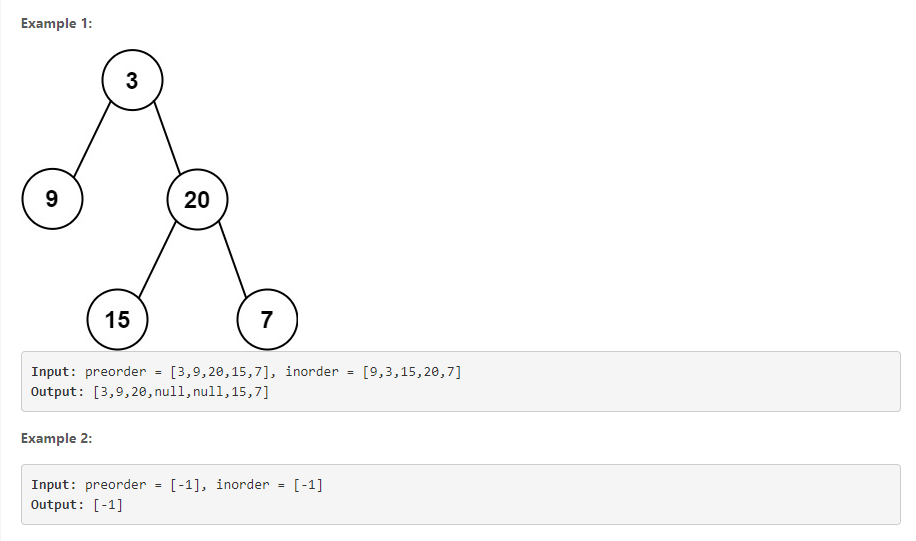

#### Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    
    
    TreeNode* helper(vector<int>& inorder, vector<int>& preorder, int s1, int t1, int s2, int t2){

        if(s1>t1){
            return nullptr;
        }
        
        TreeNode* cur= new TreeNode(preorder[s2]);
        
        if(s1==t1){
            return cur;
        }
        
        int i;
        for(i=s1;i<=t1;i++){
            if(inorder[i]==cur->val){
                break;
            }
        }
        
        // if(cur->val==20){
        //     cout<<s1<<" s1\n";
        //     cout<<t1<<" t1\n";
        //     cout<<s2<<" s2\n";
        //     cout<<t2<<" t2\n";
        //     cout<<i<<" i\n";
        // }

        cur->left = helper(inorder, preorder, s1, i-1, s2+1, s2+1+(i-s1)-1);        
        cur->right = helper(inorder, preorder, i+1, t1, s2+1+(i-s1), t2);

        // cout<<cur->val<<" cul->val\n";
        return cur;
    }
    
    
    
    
    TreeNode* buildTree(vector<int>& preorder, vector<int>& inorder) {
        TreeNode* root = helper(inorder, preorder, 0,inorder.size()-1,0,preorder.size()-1);
        return root;   
    }
};

```

### Solution

https://leetcode.com/problems/construct-binary-tree-from-preorder-and-inorder-traversal/solution/

#### Approach 1: Recursion

```java
class Solution {
    int preorderIndex;
    Map<Integer, Integer> inorderIndexMap;
    public TreeNode buildTree(int[] preorder, int[] inorder) {
        preorderIndex = 0;
        // build a hashmap to store value -> its index relations
        inorderIndexMap = new HashMap<>();
        for (int i = 0; i < inorder.length; i++) {
            inorderIndexMap.put(inorder[i], i);
        }

        return arrayToTree(preorder, 0, preorder.length - 1);
    }

    private TreeNode arrayToTree(int[] preorder, int left, int right) {
        // if there are no elements to construct the tree
        if (left > right) return null;

        // select the preorder_index element as the root and increment it
        int rootValue = preorder[preorderIndex++];
        TreeNode root = new TreeNode(rootValue);

        // build left and right subtree
        // excluding inorderIndexMap[rootValue] element because it's the root
        root.left = arrayToTree(preorder, left, inorderIndexMap.get(rootValue) - 1);
        root.right = arrayToTree(preorder, inorderIndexMap.get(rootValue) + 1, right);
        return root;
    }
}

```

## Populating Next Right Pointers in Each Node

https://leetcode.com/explore/learn/card/data-structure-tree/133/conclusion/994/

You are given a perfect binary tree where all leaves are on the same level, and every parent has two children. The binary tree has the following definition:

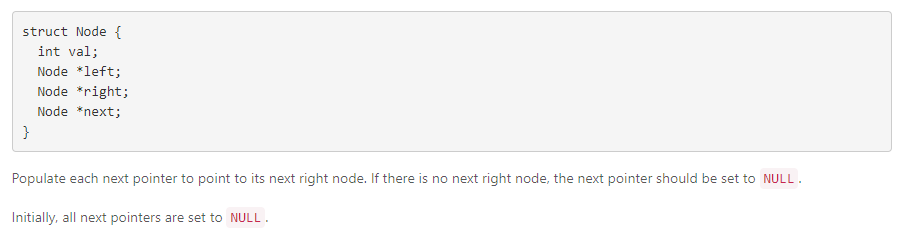

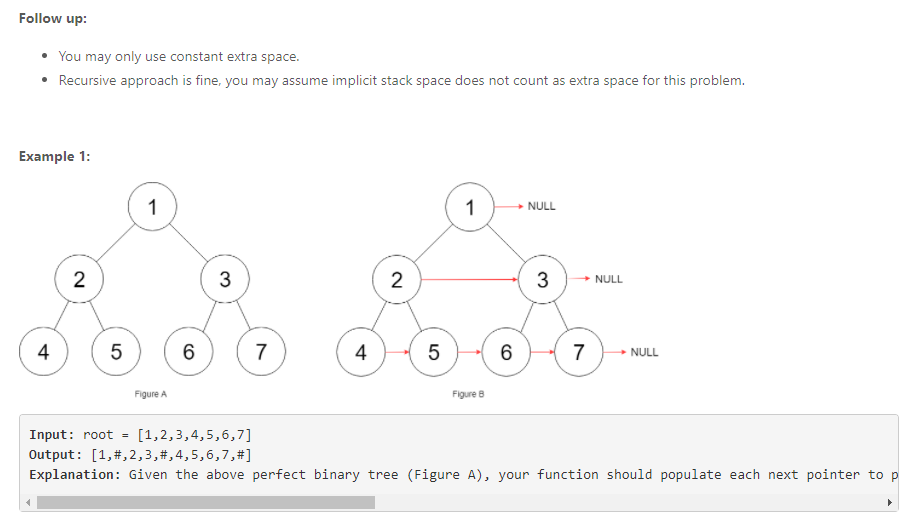

#### Accepted
```cpp
/*
// Definition for a Node.
class Node {
public:
    int val;
    Node* left;
    Node* right;
    Node* next;

    Node() : val(0), left(NULL), right(NULL), next(NULL) {}

    Node(int _val) : val(_val), left(NULL), right(NULL), next(NULL) {}

    Node(int _val, Node* _left, Node* _right, Node* _next)
        : val(_val), left(_left), right(_right), next(_next) {}
};
*/

class Solution {
public:
    Node* connect(Node* root) {
        if(!root){
            return root;
        }
        
        queue<Node*> q1;
        queue<Node*> q2;
        
        q1.push(root);
        
        while(q1.size() or q2.size()){
            while(q1.size()){
                Node* tmp=q1.front();
                q1.pop();
                if(q1.size()){
                    tmp->next = q1.front();
                }else{
                    tmp->next=NULL;
                }
                if(tmp->left){
                    q2.push(tmp->left);
                }
                if(tmp->right){
                    q2.push(tmp->right);
                }    
            }
            
            while(q2.size()){
                Node* tmp=q2.front();
                q2.pop();
                if(q2.size()){
                    tmp->next = q2.front();
                }else{
                    tmp->next=NULL;
                }
                if(tmp->left){
                    q1.push(tmp->left);
                }
                if(tmp->right){
                    q1.push(tmp->right);
                } 
            }
        }
        return root;  
    }
};

```

### Solution

https://leetcode.com/problems/populating-next-right-pointers-in-each-node/solution/

#### Approach 1: Level Order Traversal

```java
class Solution {
    public Node connect(Node root) {
        
        if (root == null) {
            return root;
        }
        
        // Initialize a queue data structure which contains
        // just the root of the tree
        Queue<Node> Q = new LinkedList<Node>(); 
        Q.add(root);
        
        // Outer while loop which iterates over 
        // each level
        while (Q.size() > 0) {
            
            // Note the size of the queue
            int size = Q.size();
            
            // Iterate over all the nodes on the current level
            for(int i = 0; i < size; i++) {
                
                // Pop a node from the front of the queue
                Node node = Q.poll();
                
                // This check is important. We don't want to
                // establish any wrong connections. The queue will
                // contain nodes from 2 levels at most at any
                // point in time. This check ensures we only 
                // don't establish next pointers beyond the end
                // of a level
                if (i < size - 1) {
                    node.next = Q.peek();
                }
                
                // Add the children, if any, to the back of
                // the queue
                if (node.left != null) {
                    Q.add(node.left);
                }
                if (node.right != null) {
                    Q.add(node.right);
                }
            }
        }
        
        // Since the tree has now been modified, return the root node
        return root;
    }
}
```

#### Approach 2: Using previously established next pointers

```java
class Solution {
    public Node connect(Node root) {
        
        if (root == null) {
            return root;
        }
        
        // Start with the root node. There are no next pointers
        // that need to be set up on the first level
        Node leftmost = root;
        
        // Once we reach the final level, we are done
        while (leftmost.left != null) {
            
            // Iterate the "linked list" starting from the head
            // node and using the next pointers, establish the 
            // corresponding links for the next level
            Node head = leftmost;
            
            while (head != null) {
                
                // CONNECTION 1
                head.left.next = head.right;
                
                // CONNECTION 2
                if (head.next != null) {
                    head.right.next = head.next.left;
                }
                
                // Progress along the list (nodes on the current level)
                head = head.next;
            }
            
            // Move onto the next level
            leftmost = leftmost.left;
        }
        
        return root;
    }
}
```

## Populating Next Right Pointers in Each Node II

https://leetcode.com/explore/learn/card/data-structure-tree/133/conclusion/1016/

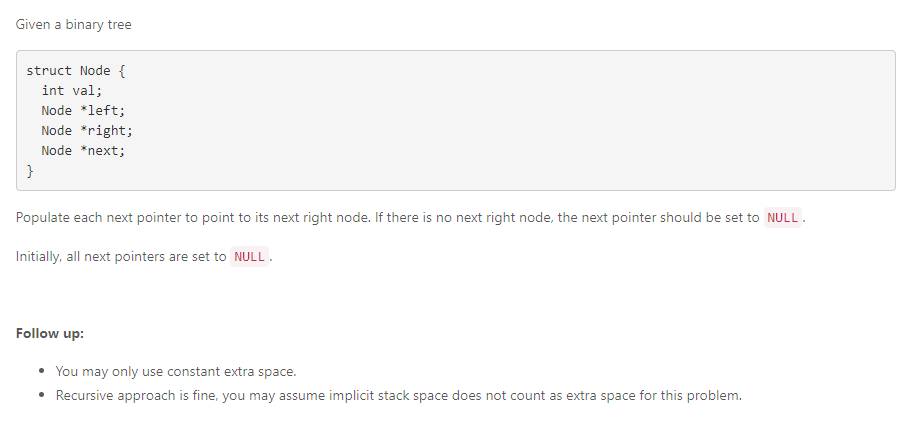

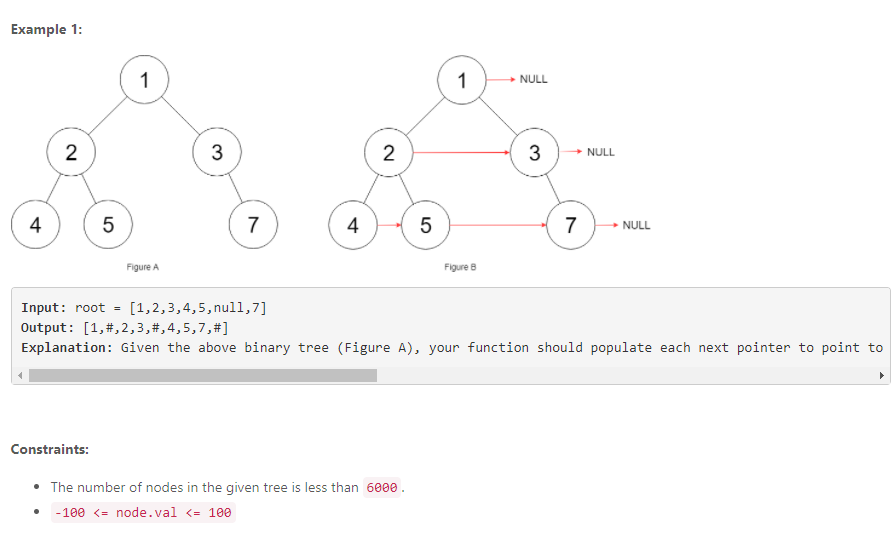

### Same as previous one.

## Lowest Common Ancestor of a Binary Tree

Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

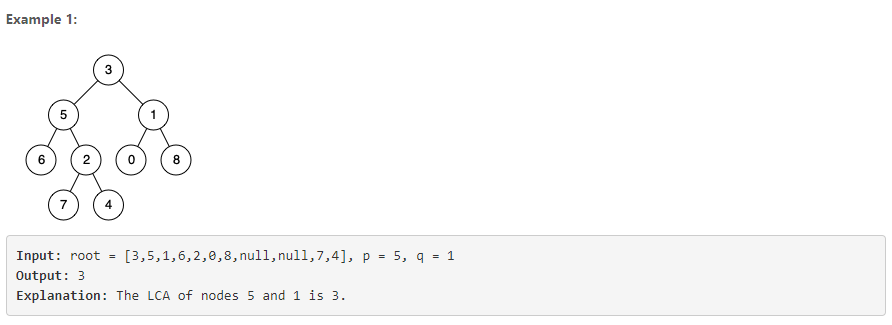

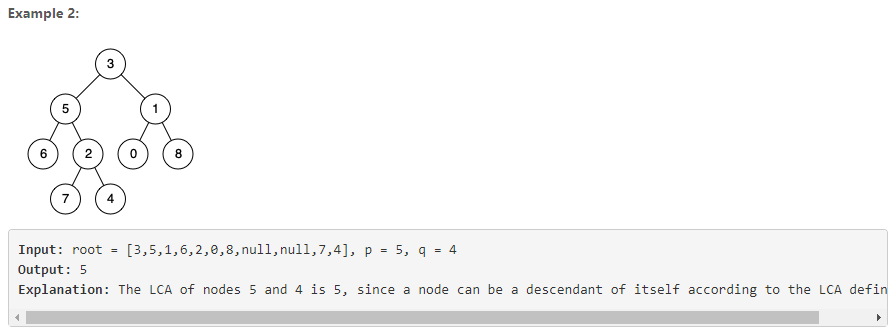

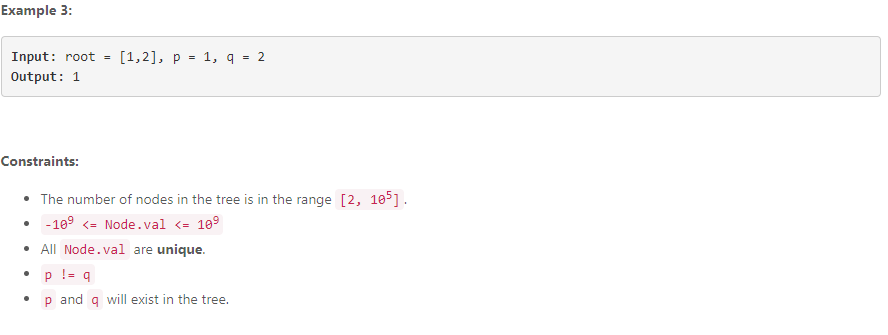

##### V1 Failed
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    
    TreeNode* BFS(TreeNode* cur, TreeNode* p, TreeNode* q){
        if(!cur){
            return NULL;
        }
        
        if((cur==p or cur->left==p or cur->right==p)
           and (cur==q or cur->left==q or cur->right==q)
          ){
            return cur;
        }
        
        TreeNode* tmp = BFS(cur->left,p,q);
        if(!tmp){
            tmp = BFS(cur->right,p,q);
        }
        
        return tmp;
        
    }

    TreeNode* lowestCommonAncestor(TreeNode* root, TreeNode* p, TreeNode* q) {
        TreeNode* lca = BFS(root,p,q);
        return lca;
    }
};
```

#### Accepted DFS

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    
    bool DFS(queue<TreeNode*>& q, TreeNode* cur, TreeNode* target){
        if(!cur){
            return false;
        }
        
        if(cur->val==target->val){
            q.push(cur);
            return true;
        }
        
        q.push(cur);
        
        if(cur->left and DFS(q,cur->left,target)){
            return true;
        }
        
        if(cur->right and DFS(q,cur->right,target)){
            return true;
        }
        
        int size=q.size()-1;
        for(int i=0;i<size;i++){
            q.push(q.front());
            q.pop();
        }
        q.pop();
        
        return false;
        
        
    }
    
    
    
    TreeNode* lowestCommonAncestor(TreeNode* root, TreeNode* p, TreeNode* q) {
        queue<TreeNode*> q1;
        queue<TreeNode*> q2;
        // TreeNode* tmp=new TreeNode(9);
        // DFS(q1, root, tmp);
        
        // while(q1.size()){
        //     TreeNode* cur=q1.front();
        //     q1.pop();
        //     cout<<cur->val<<" cur->val\n";
        // }
        
        
        DFS(q1, root, p);
        DFS(q2, root, q);
        
        
//         while(q1.size()){
//             TreeNode* cur=q1.front();
//             q1.pop();
//             cout<<cur->val<<" cur->val\n";
//         }
        
//         cout<<"\n";
        
//         while(q2.size()){
//             TreeNode* cur=q2.front();
//             q2.pop();
//             cout<<cur->val<<" cur->val\n";
//         }
        
//         return root;
        
        
        TreeNode* cur;
        while(q1.size() and q2.size()){
            if(q1.front()!=q2.front()){
                break;
            }else{
                cur=q1.front();
                q1.pop();
                q2.pop();
            }
        }

    
        return cur;
    }
};
```

### Solution
https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-tree/solution/

##### Approach 1: Recursive Approach
```java
class Solution {

    private TreeNode ans;

    public Solution() {
        // Variable to store LCA node.
        this.ans = null;
    }

    private boolean recurseTree(TreeNode currentNode, TreeNode p, TreeNode q) {

        // If reached the end of a branch, return false.
        if (currentNode == null) {
            return false;
        }

        // Left Recursion. If left recursion returns true, set left = 1 else 0
        int left = this.recurseTree(currentNode.left, p, q) ? 1 : 0;

        // Right Recursion
        int right = this.recurseTree(currentNode.right, p, q) ? 1 : 0;

        // If the current node is one of p or q
        int mid = (currentNode == p || currentNode == q) ? 1 : 0;


        // If any two of the flags left, right or mid become True
        if (mid + left + right >= 2) {
            this.ans = currentNode;
        }

        // Return true if any one of the three bool values is True.
        return (mid + left + right > 0);
    }

    public TreeNode lowestCommonAncestor(TreeNode root, TreeNode p, TreeNode q) {
        // Traverse the tree
        this.recurseTree(root, p, q);
        return this.ans;
    }
}
```

##### Approach 2: Iterative using parent pointers
```java
class Solution {

    public TreeNode lowestCommonAncestor(TreeNode root, TreeNode p, TreeNode q) {

        // Stack for tree traversal
        Deque<TreeNode> stack = new ArrayDeque<>();

        // HashMap for parent pointers
        Map<TreeNode, TreeNode> parent = new HashMap<>();

        parent.put(root, null);
        stack.push(root);

        // Iterate until we find both the nodes p and q
        while (!parent.containsKey(p) || !parent.containsKey(q)) {

            TreeNode node = stack.pop();

            // While traversing the tree, keep saving the parent pointers.
            if (node.left != null) {
                parent.put(node.left, node);
                stack.push(node.left);
            }
            if (node.right != null) {
                parent.put(node.right, node);
                stack.push(node.right);
            }
        }

        // Ancestors set() for node p.
        Set<TreeNode> ancestors = new HashSet<>();

        // Process all ancestors for node p using parent pointers.
        while (p != null) {
            ancestors.add(p);
            p = parent.get(p);
        }

        // The first ancestor of q which appears in
        // p's ancestor set() is their lowest common ancestor.
        while (!ancestors.contains(q))
            q = parent.get(q);
        return q;
    }

}
```
##### Approach 3: Iterative without parent pointers
```java
class Solution {

    // Three static flags to keep track of post-order traversal.

    // Both left and right traversal pending for a node.
    // Indicates the nodes children are yet to be traversed.
    private static int BOTH_PENDING = 2;

    // Left traversal done.
    private static int LEFT_DONE = 1;

    // Both left and right traversal done for a node.
    // Indicates the node can be popped off the stack.
    private static int BOTH_DONE = 0;

    public TreeNode lowestCommonAncestor(TreeNode root, TreeNode p, TreeNode q) {

        Stack<Pair<TreeNode, Integer>> stack = new Stack<Pair<TreeNode, Integer>>();

        // Initialize the stack with the root node.
        stack.push(new Pair<TreeNode, Integer>(root, Solution.BOTH_PENDING));

        // This flag is set when either one of p or q is found.
        boolean one_node_found = false;

        // This is used to keep track of the LCA.
        TreeNode LCA = null;

        // Child node
        TreeNode child_node = null;

        // We do a post order traversal of the binary tree using stack
        while (!stack.isEmpty()) {

            Pair<TreeNode, Integer> top = stack.peek();
            TreeNode parent_node = top.getKey();
            int parent_state = top.getValue();

            // If the parent_state is not equal to BOTH_DONE,
            // this means the parent_node can't be popped off yet.
            if (parent_state != Solution.BOTH_DONE) {

                // If both child traversals are pending
                if (parent_state == Solution.BOTH_PENDING) {

                    // Check if the current parent_node is either p or q.
                    if (parent_node == p || parent_node == q) {

                        // If one_node_found was set already, this means we have found
                        // both the nodes.
                        if (one_node_found) {
                            return LCA;
                        } else {
                            // Otherwise, set one_node_found to True,
                            // to mark one of p and q is found.
                            one_node_found = true;

                            // Save the current top element of stack as the LCA.
                            LCA = stack.peek().getKey();
                        }
                    }

                    // If both pending, traverse the left child first
                    child_node = parent_node.left;
                } else {
                    // traverse right child
                    child_node = parent_node.right;
                }

                // Update the node state at the top of the stack
                // Since we have visited one more child.
                stack.pop();
                stack.push(new Pair<TreeNode, Integer>(parent_node, parent_state - 1));

                // Add the child node to the stack for traversal.
                if (child_node != null) {
                    stack.push(new Pair<TreeNode, Integer>(child_node, Solution.BOTH_PENDING));
                }
            } else {

                // If the parent_state of the node is both done,
                // the top node could be popped off the stack.
                // Update the LCA node to be the next top node.
                if (LCA == stack.pop().getKey() && one_node_found) {
                    LCA = stack.peek().getKey();
                }

            }
        }

        return null;
    }
}
```